<a href="https://colab.research.google.com/github/kumar045/Assignment-For-Filed/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
IDdate_timeIPLONGITUDELATITUDE889723-May-2023 00:16:1323.11.235.7522.0851774.76913889723-May-2023 00:16:1323.35.33.5522.0851774.76913889723-May-2023 00:16:13216.58.196.10622.0851774.76913939923-May-2023 00:16:14142.250.194.7422.7667474.97416644223-May-2023 00:16:09142.250.194.16322.9846174.64819644223-May-2023 00:16:00139.45.197.25322.9846174.64819644223-May-2023 00:16:01139.45.197.25322.9846174.64819644223-May-2023 00:16:09139.45.197.25322.9846174.64819939923-May-2023 00:16:15142.250.194.10622.7667474.97416939923-May-2023 00:16:15142.250.194.13822.7667474.97416596223-May-2023 00:15:50157.240.198.6122.9474774.61557939923-May-2023 00:16:15142.250.194.17022.7667474.97416

In [ ]:
import pandas as pd
from openpyxl import load_workbook

# Load the Excel file using openpyxl
wb = load_workbook('/content/Data.xlsx', read_only=True)

# Select the sheet by name
sheet = wb['Sheet1']

# Read the sheet into a DataFrame, skipping the header row
data = pd.DataFrame(sheet.values)
data.columns = data.iloc[0]  # Assign the first row as column names
data = data[1:]  # Remove the first row

# Convert latitude and longitude columns to numeric types
data['LATITUDE'] = pd.to_numeric(data['LATITUDE'], errors='coerce')
data['LONGITUDE'] = pd.to_numeric(data['LONGITUDE'], errors='coerce')

# Count the occurrences of each latitude-longitude pair
location_counts = data.groupby(['LATITUDE', 'LONGITUDE']).size().reset_index(name='Frequency')

# Sort the locations by frequency in descending order
sorted_locations = location_counts.sort_values('Frequency', ascending=False)

# Display the locations with the most frequency
most_frequent_locations = sorted_locations.head()
print(most_frequent_locations)

        LATITUDE  LONGITUDE  Frequency
4115   74.817220  22.898010        533
30233  81.807833  25.179889        378
32333  82.696740  21.983538        255
36942  85.265790  23.728730        236
17811  78.161120  13.743660        212


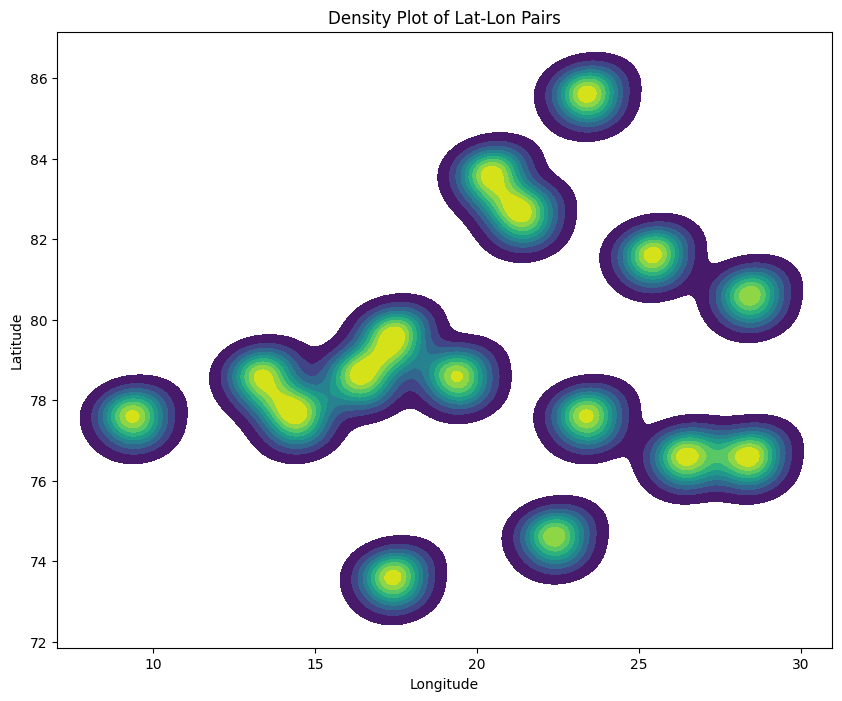

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset into a DataFrame
data = pd.read_excel('/content/Data.xlsx', engine='openpyxl', sheet_name='Sheet1')

# Convert latitude and longitude columns to numeric types
data['LATITUDE'] = pd.to_numeric(data['LATITUDE'], errors='coerce')
data['LONGITUDE'] = pd.to_numeric(data['LONGITUDE'], errors='coerce')

# Create a density plot of lat-lon pairs
plt.figure(figsize=(10, 8))
sns.kdeplot(x=data['LONGITUDE'], y=data['LATITUDE'], cmap='viridis', fill=True)
plt.title('Density Plot of Lat-Lon Pairs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:

# Group the dataset by latitude, longitude, and IP to identify unique combinations
location_ip_groups = data.groupby(['LATITUDE', 'LONGITUDE'])['IP'].nunique().reset_index(name='Unique_IP_Count')

# Sort the groups by the number of unique IPs in descending order
sorted_location_ip_groups = location_ip_groups.sort_values('Unique_IP_Count', ascending=False)

# Display the locations with the highest number of unique IPs
locations_with_correlated_ips = sorted_location_ip_groups.head()
print(locations_with_correlated_ips)

        LATITUDE  LONGITUDE  Unique_IP_Count
30233  81.807833  25.179889              376
34372  83.380760  20.606480              100
35592  83.832110  20.742050              100
32222  82.634160  21.186790               99
31220  82.091172  21.893495               94


In [ ]:
import pandas as pd
import math
import hdbscan
from sklearn.metrics.pairwise import haversine_distances
from datetime import datetime, timedelta

# Read the dataset into a DataFrame
data = pd.read_excel('/content/Data.xlsx', engine='openpyxl', sheet_name='Sheet1')

# Define the distance threshold (3 kilometers) and time threshold (30 minutes)
distance_threshold = 3  # in kilometers
time_threshold = timedelta(minutes=30)

# Convert latitude and longitude to numeric values and radians for distance calculation
data['LATITUDE'] = pd.to_numeric(data['LATITUDE'], errors='coerce')
data['LONGITUDE'] = pd.to_numeric(data['LONGITUDE'], errors='coerce')
data['LATITUDE_RAD'] = data['LATITUDE'].apply(lambda x: math.radians(x))
data['LONGITUDE_RAD'] = data['LONGITUDE'].apply(lambda x: math.radians(x))

# Convert date_time column to numerical representation (number of seconds since a reference date)
reference_date = pd.to_datetime('1970-01-01')
data['date_time'] = (pd.to_datetime(data['date_time']) - reference_date) / timedelta(seconds=1)

# Function to calculate haversine distance between two points
def haversine_distance(lat_lon1, lat_lon2):
    return haversine_distances(
        [(lat_lon1[0], lat_lon1[1])],
        [(lat_lon2[0], lat_lon2[1])]
    )[0][0] * 6371000 / 1000  # Multiply by Earth radius to get distance in kilometers

# Function to check if two timestamps are within the given time threshold
def within_time_threshold(time1, time2):
    return abs(time1 - time2) <= time_threshold

# Perform spatio-temporal clustering
clusterer = hdbscan.HDBSCAN(min_samples=2, metric=haversine_distance, cluster_selection_method='leaf')
data['Cluster'] = clusterer.fit_predict(data[['LATITUDE_RAD', 'LONGITUDE_RAD', 'date_time']].values.astype(float))

# Display the clusters and the entities within each cluster
clusters = data.groupby('Cluster')['ID'].apply(list)
print(clusters)

In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 43.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3542012 sha256=80915c60e707cf87f26cca8e7d1896ad4c2080d6bfb57342ea7f8c81aa26a12e
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
Successfully built hdbscan


In [3]:
import pandas as pd

# Read the dataset
data = pd.read_excel('/content/Data.xlsx')
import ipaddress



# Convert IP addresses to integers
data['IP'] = data['IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))

# Convert 'LATITUDE' column to numeric values
data['LATITUDE'] = pd.to_numeric(data['LATITUDE'], errors='coerce')

# Calculate the correlation between IP address and location using Pearson correlation coefficient
correlation = data['IP'].corr(data['LATITUDE'], method='pearson')

# Print the correlation value
print("Correlation between IP address and location:", correlation)

Correlation between IP address and location: -0.006057500070887276


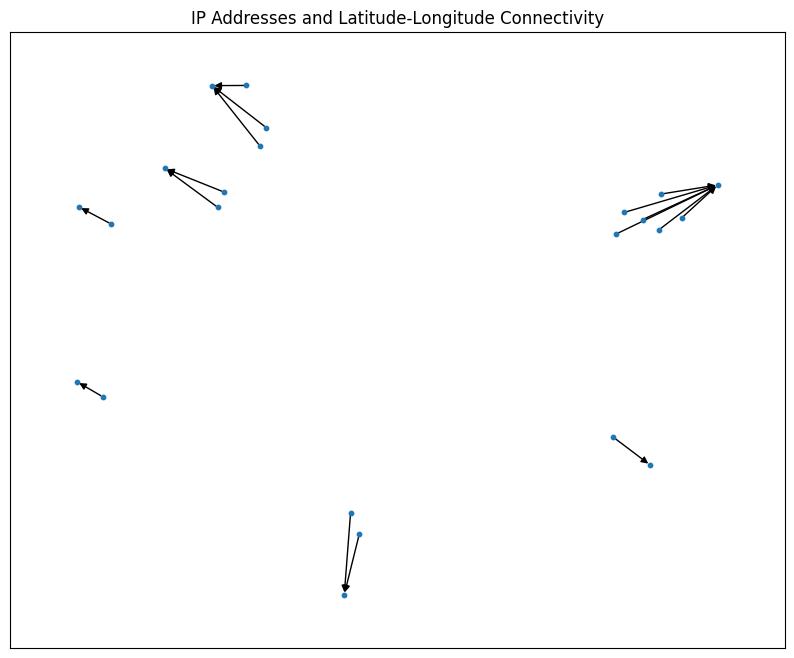

In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_excel('/content/Data.xlsx')
data=data[0:20]
# Create a directed graph
G = nx.DiGraph()

# Add IP addresses as nodes
G.add_nodes_from(data['IP'])

# Add edges connecting IP addresses and latitude-longitude coordinates
for index, row in data.iterrows():
    G.add_edge(row['IP'], (row['LATITUDE'], row['LONGITUDE']),weight=1)

# Visualize the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)  # Layout algorithm for node positioning
nx.draw_networkx(G, pos, with_labels=False, node_size=10)
plt.title('IP Addresses and Latitude-Longitude Connectivity')
plt.show()

In [ ]:
import pandas as pd
import geopandas as gpd
from pysal.explore import esda
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_excel('/content/Data.xlsx')

# Convert the dataset to a GeoDataFrame with geometry column
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data['LONGITUDE'], data['LATITUDE']))

# Calculate spatial weights using K-nearest neighbors (KNN) method
k = 5  # Number of neighbors to consider
w = esda.weights.KNN.from_dataframe(gdf, k=k)

# Calculate spatial autocorrelation
y = data['IP']  # Variable of interest
mi = esda.Moran(y, w)

# Plot Moran's scatterplot
fig, ax = plt.subplots(figsize=(10, 6))
esda.plot_moran(mi, zstandard=True, ax=ax)
ax.set_xlabel('IP')
ax.set_ylabel('Spatial Lag of IP')
plt.title('Moran Scatterplot')
plt.show()

# Get Moran's I statistic and p-value
moran_i = mi.I
p_value = mi.p_sim

# Print Moran's I statistic and p-value
print("Moran's I:", moran_i)
print("P-value:", p_value)

IP: 23.11.235.75, Degree Centrality: 0.045454545454545456
IP: 23.35.33.55, Degree Centrality: 0.045454545454545456
IP: 216.58.196.106, Degree Centrality: 0.045454545454545456
IP: 142.250.194.74, Degree Centrality: 0.045454545454545456
IP: 142.250.194.163, Degree Centrality: 0.045454545454545456
IP: 139.45.197.253, Degree Centrality: 0.045454545454545456
IP: 142.250.194.106, Degree Centrality: 0.045454545454545456
IP: 142.250.194.138, Degree Centrality: 0.045454545454545456
IP: 157.240.198.61, Degree Centrality: 0.045454545454545456
IP: 142.250.194.170, Degree Centrality: 0.045454545454545456
IP: 142.250.194.202, Degree Centrality: 0.045454545454545456
IP: 117.96.122.15, Degree Centrality: 0.045454545454545456
IP: 142.250.194.234, Degree Centrality: 0.045454545454545456
IP: 129.227.198.112, Degree Centrality: 0.045454545454545456
IP: 157.240.198.35, Degree Centrality: 0.045454545454545456
IP: 157.240.198.17, Degree Centrality: 0.045454545454545456
IP: (74.76913, 22.08517), Degree Centra

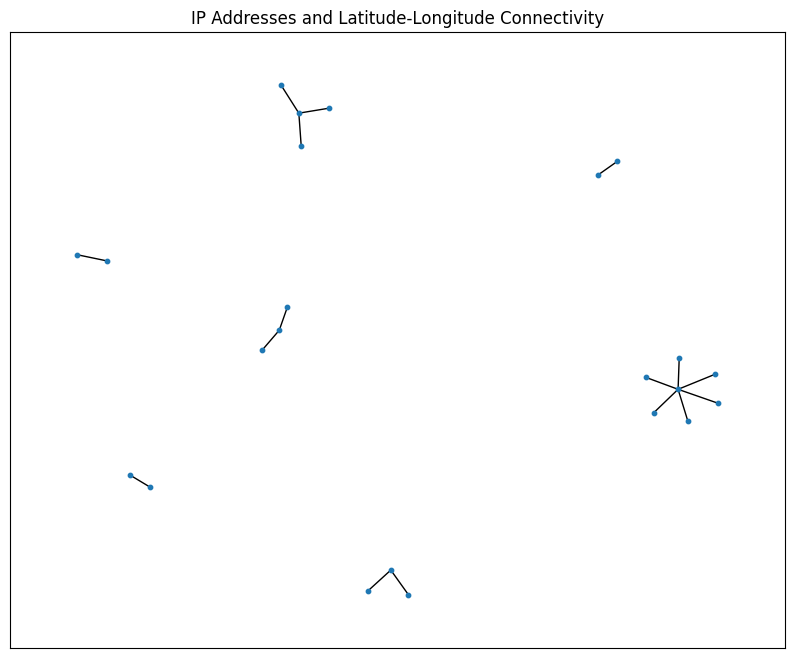

In [19]:

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
df = pd.read_excel('/content/Data.xlsx')
df=df[0:20]
# Create an empty graph
G = nx.Graph()

# Add nodes (IP addresses) to the graph
G.add_nodes_from(df['IP'])

# Add edges between IP addresses and their corresponding coordinates
for row in df.itertuples():
    G.add_edge(str(row.IP), f"({row.LATITUDE}, {row.LONGITUDE})")

# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Calculate eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=500)

# Print centrality measures for IP addresses
for ip, degree in degree_centrality.items():
    print(f"IP: {ip}, Degree Centrality: {degree}")

for ip, betweenness in betweenness_centrality.items():
    print(f"IP: {ip}, Betweenness Centrality: {betweenness}")

for ip, eigenvector in eigenvector_centrality.items():
    print(f"IP: {ip}, Eigenvector Centrality: {eigenvector}")

# Perform community detection using Louvain algorithm
communities = community.greedy_modularity_communities(G)

# Print IP addresses belonging to each community
for i, community in enumerate(communities):
    print(f"Community {i+1}: {', '.join(list(community))}")

# Visualize the network
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx(G, pos, with_labels=False, node_size=10)
plt.title('IP Addresses and Latitude-Longitude Connectivity')
plt.show()